In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Flatten, Dense
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
input_ = Input(shape=(28,28))
l2 = Flatten()(input_)
l3 = Dense(400, activation='relu', name='l3')(l2)
l4 = Dense(100, activation='relu', name='l4')(l3)
l5 = Dense(400, activation='relu', name='l5')(l4)
l6 = Dense(784, activation='sigmoid', name='l6')(l5)
out= Reshape(target_shape=(28,28))(l6)

In [5]:
model = Model(inputs=[input_], outputs=[out])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
l3 (Dense)                   (None, 400)               314000    
_________________________________________________________________
l4 (Dense)                   (None, 100)               40100     
_________________________________________________________________
l5 (Dense)                   (None, 400)               40400     
_________________________________________________________________
l6 (Dense)                   (None, 784)               314384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0     

In [7]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(x_train/255, x_train/255, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 369us/sample - loss: 0.0152 - accuracy: 0.2662
Epoch 2/5
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0056 - accuracy: 0.3114
Epoch 3/5
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0044 - accuracy: 0.3218
Epoch 4/5
60000/60000 [==============================] - 17s 276us/sample - loss: 0.0039 - accuracy: 0.3264
Epoch 5/5
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0036 - accuracy: 0.3292


In [9]:
out = model.predict(x_test[:5])

In [10]:
out[0].shape

(28, 28)

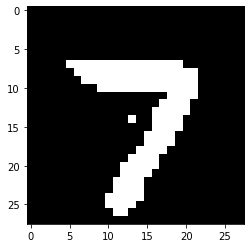

In [11]:
plt.imshow(out[0], cmap='gray')

In [12]:
encoder = Model(inputs =[model.input], outputs=[model.layers[3].output])

In [13]:
res= encoder.predict(x_test)

In [14]:
res.shape

(10000, 100)

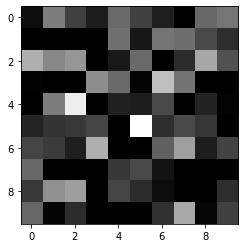

In [15]:
plt.imshow(res[0].reshape(10,10), cmap='gray')